In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('modified_data.csv')

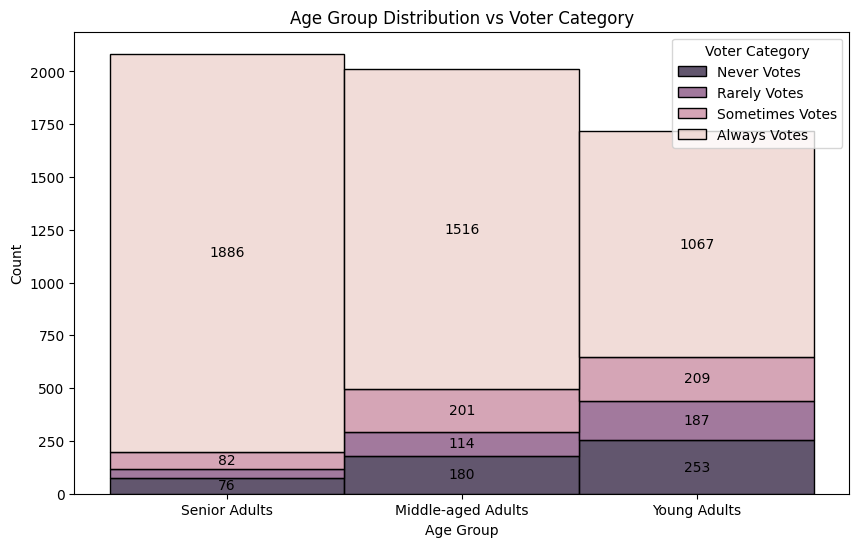

In [79]:
# plot histogram for Age_grp with Q24
temp = data[data['Q24'] != -1]
plt.figure(figsize=(10, 6))
sns_hist  = sns.histplot(data=temp, x='Age_grp', hue='Q24', multiple='stack')
# set data labels
plt.legend(title='Voter Category', labels=['Never Votes', 'Rarely Votes','Sometimes Votes', 'Always Votes'])
plt.title('Age Group Distribution vs Voter Category')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Annotate each section with data values
for p in sns_hist.patches:
    height = p.get_height()
    if height > 50:
        plt.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height/2+p.get_y()),
                     va = 'center', ha = 'center',)
plt.savefig('./Topic charts/topic-1.png', dpi=300, bbox_inches='tight')
plt.show()

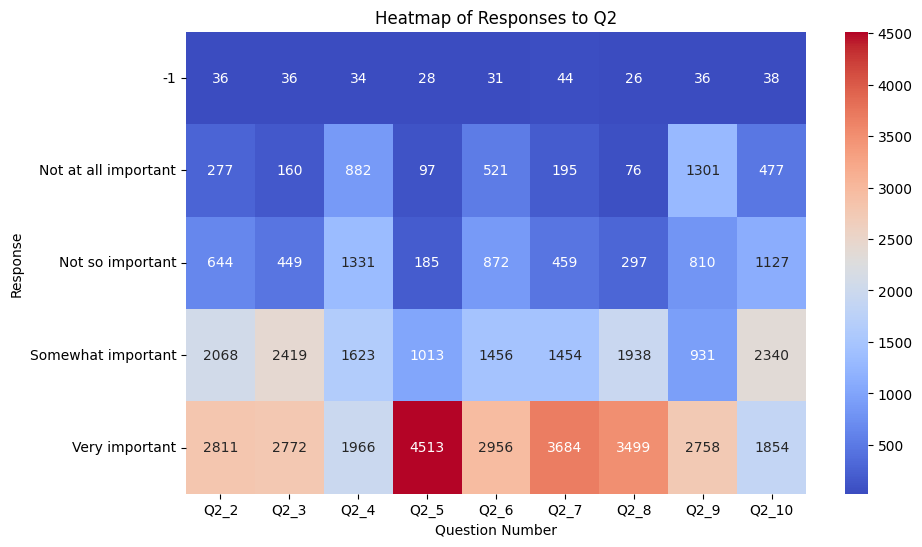

In [11]:
q2_columns = ['Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Q2_10']

# Creating a pivot table to count the occurrences of each option in each question
pivot_table = data[q2_columns].apply(pd.Series.value_counts).fillna(0)

# Plotting the pivot table
plt.figure(figsize=(10, 6))
sns_heatmap = sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='g')
plt.title('Heatmap of Responses to Q2')
plt.xlabel('Question Number')
plt.ylabel('Response')
plt.savefig('./Topic charts/Q-2.png', dpi=300, bbox_inches='tight')
plt.show()